In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
# read the data
data = pd.read_csv('responses_AB_paired_final_processed.csv')

In [3]:
# find the count of a column values
data['expertise'] = data.apply(lambda row: row['expertise_other'] if row['expertise'] == 'Other' else row['expertise'], axis=1)
expertise_plot = data['expertise'].value_counts(ascending=True)

In [4]:
# categorise the expertises
categories = defaultdict(int)
categories_mapping = {
    "STEM": [
        "Physics", "Molecular Biology", "chemical engineering ", "Chemistry", "Earth Science",
        "Mathematics", "Computer Science", "Natural Language Processing, Digital Humanities",
        "Computer Science/ Cybersecurity", "Web Security & Privacy", "security", "Computer vision, machine learning",
        "Wireless networks", "Machine Learning Engineering", "Data Science", "Software engineering",
        "Web or Software Development", "librarian with master in mathematics"
    ],
    "Health & Sport Sciences": [
        "Health or Mental Health Science", "Nutrition", "Sport Science"
    ],
    "Social Sciences & Humanities": [
        "Philosophy ", "international relations", "Social science (economics and trade)",
        "Journalist ", "Classics", "education"
    ],
    "Applied Sciences & Engineering": [
        "Civil Engineering", "business administration", "Food processing", "Innovation support"
    ]
}

for category, expertise_list in categories_mapping.items():
    for expertise in expertise_list:
        if expertise in expertise_plot:
            categories[category] += expertise_plot[expertise]
expertise_plot = pd.Series(categories)
expertise_plot = expertise_plot.sort_values(ascending=True)

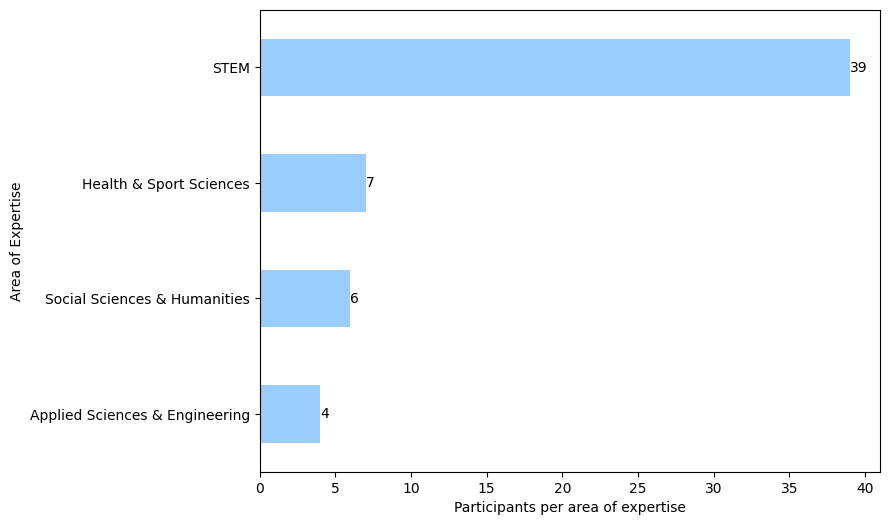

In [5]:
# plot a horizontal barchart
plt.figure(figsize=(8, 6))
expertise_plot.plot(kind='barh', color='#99ccff')
for index, value in enumerate(expertise_plot):
    plt.text(value, index, str(value), va='center') 
plt.xlabel('Participants per area of expertise')
plt.ylabel('Area of Expertise')
plt.show()